In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly_express as px

In [2]:
df = px.data.iris()
all_dims = ['sepal_length', 'sepal_width', 
            'petal_length', 'petal_width']
print(df.columns)
spec = list(df['species'].unique())
spec

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')


['setosa', 'versicolor', 'virginica']

Matplotlib Plot

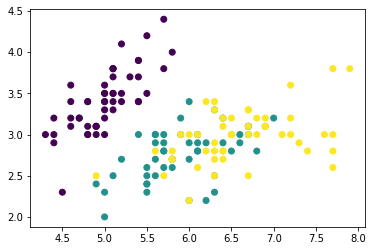

In [3]:
x= df['sepal_length']
y= df['sepal_width']
color = df['species_id']
plt.scatter(x, y, c=color)
plt.show()

Plotly Express Plot

In [4]:
fig1 = px.scatter(df,x=x,y=y, color= color)
fig2 = px.density_contour(df,x=x,y=y, color= 'species', marginal_y='histogram')
fig1.show()
fig2.show()

Prediction Model

In [8]:
df = df.sample(frac = 1)
df_train = df.head(120)
df_test = df.tail(30)
x_train = np.array(df_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y_train = np.array(df_train['species_id'])
x_test = np.array(df_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y_test = np.array(df_test['species_id'])

# print(f'x_train:\n{x_train}\n')
# print(f'y_train:\n{y_train}\n')
# print(f'y_test:\n{y_test}\n')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 1, 3, 3, 3, 3, 1, 2, 3,
       2, 2, 1, 3, 1, 2, 2, 2], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9666666666666667


Save the Model

In [12]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
69,5.6,2.5,3.9,1.1,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,2
127,6.1,3.0,4.9,1.8,virginica,3
46,5.1,3.8,1.6,0.2,setosa,1
34,4.9,3.1,1.5,0.1,setosa,1


In [16]:
arr = np.array([[5, 3, 1.5, 0.1]])
pred = model.predict(arr)
pred

array([1], dtype=int64)